# Credit Card Fraud Detection 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv('creditcard.csv')

In [6]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We Observe there are no Missing Values Or Categorical Values

In [13]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [17]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
legit_sample= legit.sample(n=492)

In [22]:
new_dataset= pd.concat([legit_sample, fraud], axis=0)

In [23]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
187762,127681.0,1.901463,0.552643,-0.481182,3.944113,0.335964,-0.109623,0.231971,-0.187992,-0.831883,...,0.094315,0.510277,0.063329,0.078412,0.173760,0.089763,-0.018818,-0.046877,11.36,0
202103,134175.0,-1.282037,0.649078,0.278832,-0.351788,0.458993,-0.338659,0.148229,0.748974,-0.334217,...,-0.042908,-0.479714,-0.171138,0.563818,0.689595,0.330221,0.007779,-0.116834,49.95,0
112306,72603.0,1.042722,-0.627399,0.373133,-0.698116,-0.881369,-0.539887,-0.246547,-0.006847,1.643167,...,0.075645,0.268503,-0.149835,0.102473,0.553869,-0.605191,0.067916,0.038733,97.55,0
220178,142058.0,-1.554482,1.570923,0.401033,-0.765301,-0.394170,-0.867812,-0.153118,0.809000,0.136189,...,-0.133636,-0.488819,0.069672,-0.131412,-0.221420,-0.274972,-0.119698,0.083753,3.85,0
149649,91653.0,0.005597,1.694718,-1.468730,3.075278,1.532849,-0.269551,1.824591,-0.094396,-1.243690,...,0.349457,0.975922,0.121539,0.649076,0.070742,0.124125,-0.212518,-0.062361,121.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [25]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [26]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94351.786585,0.079563,0.046262,0.002903,-0.004239,-0.064186,-0.074556,0.062870,-0.006676,0.024836,...,0.031038,-0.020513,0.007183,0.037700,0.060606,0.013565,-0.022059,-0.001871,-0.004520,91.972480
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [42]:
new_dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.234738,-0.217918,0.148352,-0.214927,0.283826,0.094437,0.220934,-0.147070,0.142320,...,-0.070662,0.115422,0.059652,-0.037191,-0.194009,-0.044318,-0.142874,-0.018461,0.023367,-0.142474
V1,0.234738,1.000000,-0.807388,0.881290,-0.614540,0.860679,0.310496,0.883815,-0.084687,0.668899,...,0.008989,-0.036744,-0.053505,-0.037865,-0.071801,0.050668,0.196147,0.200617,-0.033022,-0.440098
V2,-0.217918,-0.807388,1.000000,-0.859471,0.684367,-0.790586,-0.253393,-0.838887,-0.020560,-0.693950,...,0.038866,0.001527,0.116987,-0.035722,0.096421,0.020838,-0.168155,0.005505,-0.223901,0.485518
V3,0.148352,0.881290,-0.859471,1.000000,-0.768018,0.846125,0.447158,0.886512,-0.171527,0.775535,...,0.026675,-0.061522,-0.022947,0.047169,-0.087525,-0.027590,0.110032,0.136598,-0.000101,-0.566479
V4,-0.214927,-0.614540,0.684367,-0.768018,1.000000,-0.572874,-0.409514,-0.705496,0.104925,-0.791187,...,-0.018543,0.109980,0.009605,-0.101347,-0.025755,0.157040,-0.003903,-0.072660,-0.010311,0.709457
V5,0.283826,0.860679,-0.790586,0.846125,-0.572874,1.000000,0.252740,0.819370,-0.204792,0.650681,...,0.044825,-0.092903,-0.088216,-0.128822,-0.096689,0.037100,0.184697,0.176930,-0.146160,-0.365491
V6,0.094437,0.310496,-0.253393,0.447158,-0.409514,0.252740,1.000000,0.284553,-0.562624,0.358739,...,0.014219,0.005602,0.327063,0.026685,-0.098551,-0.031416,-0.142993,-0.036638,0.205384,-0.375952
V7,0.220934,0.883815,-0.838887,0.886512,-0.705496,0.819370,0.284553,1.000000,0.083505,0.762562,...,0.038580,-0.112222,-0.079344,-0.020105,0.062328,0.017936,0.239829,0.147789,0.150582,-0.478518
V8,-0.147070,-0.084687,-0.020560,-0.171527,0.104925,-0.204792,-0.562624,0.083505,1.000000,-0.078661,...,-0.108149,0.032230,-0.423130,0.071655,0.226172,0.039844,0.283365,-0.022677,0.015355,0.059310
V9,0.142320,0.668899,-0.693950,0.775535,-0.791187,0.650681,0.358739,0.762562,-0.078661,1.000000,...,0.158319,-0.235942,-0.042623,0.045661,0.012304,-0.141751,0.129089,0.131489,0.012375,-0.561678


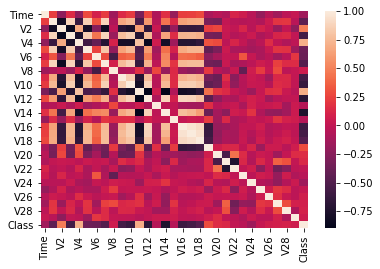

In [43]:
sns.heatmap(new_dataset.corr())

# Split data into X & Y

In [28]:
y= new_dataset['Class']
X= new_dataset.drop(columns='Class', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [32]:
print(X_train.shape)

(787, 30)


# Logistic Regression

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train, y_train)

C:\Users\91976\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [35]:
X_train_prediction= model.predict(X_train)

In [36]:
training_data_accuracy= accuracy_score(X_train_prediction, y_train)

In [37]:
print('Accuracy on Training Data:',training_data_accuracy )

Accuracy on Training Data: 0.9479034307496823


In [39]:
X_test_prediction= model.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction, y_test)

In [40]:
print('Accuracy on Testing Data:', test_data_accuracy)

Accuracy on Testing Data: 0.9543147208121827


# Random Forest

In [45]:
rf_random= RandomForestRegressor()

In [46]:
#Randomized Search CV to search for best HyperParameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [47]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [50]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [51]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [52]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [53]:
rf_random.best_score_

-0.050496876884624696

In [55]:
predictions=rf_random.predict(X_test)

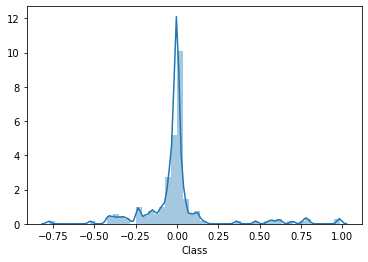

In [56]:
sns.distplot(y_test-predictions)

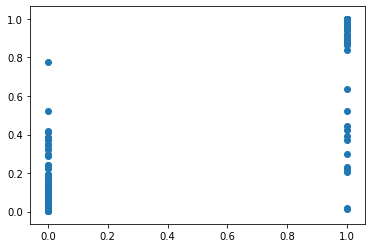

In [57]:
plt.scatter(y_test,predictions)

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.10846700507614214
MSE: 0.04779145177664974
RMSE: 0.21861256088489
